In [11]:
from __future__ import print_function

# for data analysis
import pandas as pd 
import numpy as np

# for data visuals
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for deep neural network
import keras


from sklearn.preprocessing import MinMaxScaler


### Step 1: Reading data
#####  splitting data into 2 sets-train and test sets
##### anything with last column more than 1, we make to 1 as its a binary class problem problem
##### done by pandas to do so


In [16]:
# names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope','ca','thal','num']
trainData = pd.read_csv('processed_cleveland_data_train.csv')
# actualData= pd.read_csv('processed_cleveland_data.csv')
# print (actualdata.size)
testData = pd.read_csv('processed_cleveland_data_test.csv')
# print (trainData.size)
# print (testData.size)

# Parameter of interest is num, for now this is a binary problem
def replace_predict(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)

        
replace_predict(trainData)
replace_predict(testData)
# replace_predict(actualData)
# dataframe = pd.read_csv(actualData, names=names)
# print(dataframe)
scaler = MinMaxScaler(feature_range=(0, 1))

Xtrain = trainData.drop(['num'], axis=1)
Ytrain = trainData['num']


Xtest = testData.drop(['num'], axis=1)
Ytest = testData['num']

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

# trainData.sample(10)

/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
# trainData = pd.read_csv('processed_cleveland_data_train.csv')
# actualdata= pd.read_csv('processed_cleveland_data.csv')
# print (actualdata.size)
# testData = pd.read_csv('processed_cleveland_data_test.csv')
# print (trainData.size)
# print (testData.size)

# # Parameter of interest is num, for now this is a binary problem
# def replace_predict(df):
#     df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)

        
# replace_predict(trainData)
# replace_predict(testData)

# trainData.sample(10)

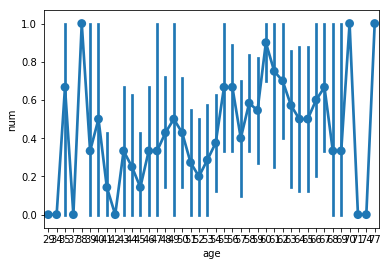

In [18]:
sns.pointplot(x='age', y='num', data=trainData)

In [19]:
# Xtrain = trainData.drop(['num'], axis=1)
# Ytrain = trainData['num']

# Xtest = testData.drop(['num'], axis=1)
# Ytest = testData['num']


### Step 2: Define Model
#### This is binary classification model, so the model output is yes or no, thus making it ideal for the problem 
#### making use of keras sequential model using tensorflow, tensor flow has main algorthims, tensor flow looks diff., keras API using tensorflow algorthims to solve the problem



In [32]:

from keras.models import Sequential
from keras.layers import Dense,Dropout
# creating model
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



 

### Step 3: Compile Model


In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Step 4: Fit model

In [42]:

model.fit(Xtrain, Ytrain, epochs=350, batch_size=8)


Epoch 1/350
236/236 [==============================] - 0s 717us/step - loss: 0.0877 - acc: 0.9746
Epoch 2/350
236/236 [==============================] - 0s 631us/step - loss: 0.0812 - acc: 0.9746
Epoch 3/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0873 - acc: 0.9619
Epoch 4/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0884 - acc: 0.9661
Epoch 5/350
236/236 [==============================] - 0s 918us/step - loss: 0.0815 - acc: 0.9788
Epoch 6/350
236/236 [==============================] - 0s 782us/step - loss: 0.0781 - acc: 0.9746
Epoch 7/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0758 - acc: 0.9831
Epoch 8/350
236/236 [==============================] - 0s 744us/step - loss: 0.0766 - acc: 0.9746
Epoch 9/350
236/236 [==============================] - 0s 623us/step - loss: 0.0779 - acc: 0.9746
Epoch 10/350
236/236 [==============================] - 0s 664us/step - loss: 0.0790 - acc: 0.9746
Epoch 11/350
236/236 [===

236/236 [==============================] - 0s 885us/step - loss: 0.0445 - acc: 0.9831
Epoch 84/350
236/236 [==============================] - 0s 767us/step - loss: 0.0465 - acc: 0.9831
Epoch 85/350
236/236 [==============================] - 0s 776us/step - loss: 0.0410 - acc: 0.9873
Epoch 86/350
236/236 [==============================] - 0s 693us/step - loss: 0.0397 - acc: 0.9831
Epoch 87/350
236/236 [==============================] - 0s 777us/step - loss: 0.0411 - acc: 0.9873
Epoch 88/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0397 - acc: 0.9831A: 0s - loss: 0.0450 - acc: 0.97
Epoch 89/350
236/236 [==============================] - 0s 828us/step - loss: 0.0442 - acc: 0.9788
Epoch 90/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0406 - acc: 0.9831
Epoch 91/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0414 - acc: 0.9831
Epoch 92/350
236/236 [==============================] - 0s 897us/step - loss: 0.0391 - acc: 0.98

236/236 [==============================] - 0s 1ms/step - loss: 0.0231 - acc: 0.9915
Epoch 166/350
236/236 [==============================] - 0s 568us/step - loss: 0.0287 - acc: 0.9915
Epoch 167/350
236/236 [==============================] - 0s 517us/step - loss: 0.0258 - acc: 0.9958
Epoch 168/350
236/236 [==============================] - 0s 477us/step - loss: 0.0239 - acc: 1.0000
Epoch 169/350
236/236 [==============================] - 0s 568us/step - loss: 0.0230 - acc: 0.9958
Epoch 170/350
236/236 [==============================] - 0s 733us/step - loss: 0.0198 - acc: 1.0000
Epoch 171/350
236/236 [==============================] - 0s 563us/step - loss: 0.0213 - acc: 1.0000
Epoch 172/350
236/236 [==============================] - 0s 540us/step - loss: 0.0196 - acc: 1.0000
Epoch 173/350
236/236 [==============================] - 0s 491us/step - loss: 0.0212 - acc: 1.0000
Epoch 174/350
236/236 [==============================] - 0s 443us/step - loss: 0.0267 - acc: 0.9915
Epoch 175/350
23

236/236 [==============================] - 0s 571us/step - loss: 0.0769 - acc: 0.9746
Epoch 248/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0253 - acc: 0.9958
Epoch 249/350
236/236 [==============================] - 0s 787us/step - loss: 0.0151 - acc: 1.0000
Epoch 250/350
236/236 [==============================] - 0s 705us/step - loss: 0.0145 - acc: 1.0000
Epoch 251/350
236/236 [==============================] - 0s 742us/step - loss: 0.0115 - acc: 1.0000
Epoch 252/350
236/236 [==============================] - 0s 616us/step - loss: 0.0119 - acc: 1.0000
Epoch 253/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0123 - acc: 1.0000
Epoch 254/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0112 - acc: 1.0000
Epoch 255/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0110 - acc: 1.0000
Epoch 256/350
236/236 [==============================] - 0s 490us/step - loss: 0.0121 - acc: 1.0000
Epoch 257/350
236/236 

236/236 [==============================] - 1s 2ms/step - loss: 0.0135 - acc: 0.9958
Epoch 329/350
236/236 [==============================] - 0s 2ms/step - loss: 0.0070 - acc: 1.0000
Epoch 330/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0074 - acc: 1.0000
Epoch 331/350
236/236 [==============================] - 1s 3ms/step - loss: 0.0075 - acc: 1.0000
Epoch 332/350
236/236 [==============================] - 0s 2ms/step - loss: 0.0063 - acc: 1.0000
Epoch 333/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0065 - acc: 1.0000
Epoch 334/350
236/236 [==============================] - 0s 2ms/step - loss: 0.0064 - acc: 1.0000
Epoch 335/350
236/236 [==============================] - 0s 2ms/step - loss: 0.0064 - acc: 1.0000- ETA: 0s - loss: 0.0017 - acc: 1.0000    - ETA: 0s - loss: 0.0035 - acc: 1
Epoch 336/350
236/236 [==============================] - 0s 1ms/step - loss: 0.0068 - acc: 1.0000
Epoch 337/350
236/236 [==============================] - 

### Step 5: Evaluate Model


In [43]:
# evaluate the model
scores = model.evaluate(Xtest, Ytest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

61/61 [==============================] - 0s 395us/step

acc: 70.49%


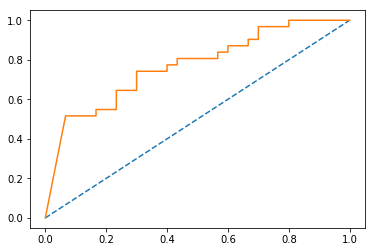

0.7688172043010753


In [44]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score


#RANDOM FOREST
probs = model.predict_proba(Xtest)

# keep probabilities for the positive outcome only

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ytest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()
#calulate ROC AUC score
loss = roc_auc_score(Ytest, probs)
print(loss)

### Save Model

In [46]:
from sklearn.metrics import matthews_corrcoef
count=0
matthewsCoeff=matthews_corrcoef(Ytest, scores )   
print(matthewsCoeff)

ValueError: Found input variables with inconsistent numbers of samples: [61, 2]

In [10]:
from keras.models import load_model

model.save('/Users/Sahithi/HeartModels/HeartDiseaseKeras.h5')

OSError: Unable to create file (unable to open file: name = '/Users/Sahithi/HeartModels/HeartDiseaseKeras.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 602)

### Personal step- Prediction with the Model

In [ ]:
predictions= model.predict(Xtrain)
rounded = [round(x[0]) for x in predictions]
print(rounded)


### Step 6: Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

alldata = pd.read_csv('processed_cleveland_data.csv')
replace_predict(alldata)
Xall = alldata.drop(['num'], axis=1)
Yall = alldata['num']

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train_index, test_index in kfold.split(Xall, Yall):
  # create model
 model = Sequential()
 model.add(Dense(12, input_dim=13, activation='relu'))
 model.add(Dense(8, activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 # Fit the model
 Xtrain, Xtest = Xall.values[train_index], Xall.values[test_index]
 Ytrain, Ytest = Yall.values[train_index], Yall.values[test_index]
 #print(Xtrain)
 #print(Ytrain)
 model.fit(Xtrain, Ytrain, epochs=350, batch_size=8, verbose=0)
 # evaluate the model
 scores = model.evaluate(Xall.values[test_index], Yall.values[test_index], verbose=0)
 print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))